<h1 style='text-align:center;font-weight:bold;color:white'> Analysis of the Characteristics of Individuals Eligible for the Pension Program</h1>

# **Introduction**

This project aims to analyze individual characteristics that qualify for participation in a pension program, using data containing demographic and financial information. The main objective of this analysis is to identify criteria that influence a person's eligibility for the pension program, as well as to understand how these factors interact with each other.

## **Attribute Infromation**

| Attribute | Data Type | Description                                           |
|-----------|-----------|-------------------------------------------------------|
| e401k     | Integer   | Eligibility for pension program                       |
| inc       | Float     | Personal income per week                              |
| marr      | Integer   | If the individual is married                          |
| male      | Integer   | If the individual is male                             |
| age       | Integer   | Age of the individual                                 |
| fsize     | Integer   | Family size of the individual                         |
| nettfa    | Float     | Net total assets, per 1000 USD                        |
| p401k     | Integer   | If already participating in the e401k program         |
| pira      | Integer   | If having an individual retirement account            |
| incsq     | Float     | Income squared                                        |
| agesq     | Integer   | Age squared                                           |


# **Data Understanding**

### **Import Library and Dataset**

In [129]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)


import matplotlib.pyplot as plt
import plotly.express as px
import dataframe_image as dfi

In [165]:
df = pd.read_stata('401ksubs.dta')
df.head(5)

,e401k,inc,marr,male,age,fsize,nettfa,p401k,pira,incsq,agesq
0,0,13.170000,0,0,40,1,4.575000,0,1,173.448898,1600
1,1,61.230000,0,1,35,1,154.000000,1,0,3749.112793,1225
2,0,12.858000,1,0,44,2,0.000000,0,0,165.328156,1936
3,0,98.879997,1,1,44,2,21.799999,0,0,9777.253906,1936
4,0,22.614000,0,0,53,1,18.450001,0,0,511.393005,2809


### **Initial Inspection**

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9275 entries, 0 to 9274
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   e401k   9275 non-null   int8   
 1   inc     9275 non-null   float32
 2   marr    9275 non-null   int8   
 3   male    9275 non-null   int8   
 4   age     9275 non-null   int8   
 5   fsize   9275 non-null   int8   
 6   nettfa  9275 non-null   float32
 7   p401k   9275 non-null   int8   
 8   pira    9275 non-null   int8   
 9   incsq   9275 non-null   float32
 10  agesq   9275 non-null   int16  
dtypes: float32(3), int16(1), int8(7)
memory usage: 190.3 KB


> **Insight:**

- The dataset consists of 11 columns and 9275 rows
- Our data includes both numerical columns (int/float) and categorical columns (e401k, marr, male, p401k, pira)


In [4]:
# create function to inspect dataset
def inspect_dataset(df):
    print(f'Datasetnya memiliki {df.shape[0]} baris dan {df.shape[1]} kolom.')
    summary = {
        'column_name': df.columns.values.tolist(),
        'n_row': df.shape[0],
        'data_type': df.dtypes.values.tolist(),
        'nan_pct': (df.isna().mean() * 100).round(2).tolist(),
        'duplicated_pct': (df.duplicated().sum()/len(df)*100).round(2),
        'n_unique': df.nunique().tolist(),
        'sample_value': [df[col].unique() for col in df.columns]
    }
    return pd.DataFrame(summary)

In [166]:
inspect_dataset(df)

Datasetnya memiliki 9275 baris dan 11 kolom.


,column_name,n_row,data_type,nan_pct,duplicated_pct,n_unique,sample_value
0,e401k,9275,int8,0.0,0.01,2,"[0, 1]"
1,inc,9275,float32,0.0,0.01,6852,"[13.17, 61.23, 12.858, 98.88, 22.614, 15.0, 37.155, 31.896, 47.295, 29.1, 23.457, 31.785, 34.941, 24.432, 25.131, 19.074, 38.772, 12.48, 45.39, 39.861, 102.6, 39.579, 40.194, 25.254, 10.8, 27.0, 17.856, 38.94, 12.24, 18.0, 21.456, 14.025, 15.186, 41.415, 12.966, 58.8, 63.849, 47.1, 36.072, 107.64, 58.92, 48.615, 29.205, 24.441, 18.525, 15.36, 53.475, 31.056, 19.164, 44.376, 28.329, 37.38, 17.817, 71.028, 28.476, 34.041, 25.86, 77.355, 15.414, 73.902, 10.545, 24.177, 33.42, 53.226, 31.869, 26.946, 90.726, 28.8, 23.193, 36.036, 56.082, 16.032, 52.236, 39.63, 34.47, 31.548, 31.2, 19.806, 74.529, 26.682, 33.75, 146.577, 23.718, 19.302, 29.4, 16.977, 19.734, 14.28, 30.075, 33.96, 64.5, 24.03, 21.111, 51.798, 17.364, 19.254, 27.603, 31.44, 30.24, 16.83, ...]"
2,marr,9275,int8,0.0,0.01,2,"[0, 1]"
3,male,9275,int8,0.0,0.01,2,"[0, 1]"
4,age,9275,int8,0.0,0.01,40,"[40, 35, 44, 53, 60, 49, 38, 52, 45, 61, 48, 43, 47, 27, 57, 36, 31, 42, 32, 46, 25, 39, 34, 41, 63, 51, 28, 54, 58, 30, 26, 33, 50, 64, 62, 37, 56, 55, 59, 29]"
5,fsize,9275,int8,0.0,0.01,13,"[1, 2, 3, 5, 6, 4, 8, 7, 13, 10, 11, 12, 9]"
6,nettfa,9275,float32,0.0,0.01,5025,"[4.575, 154.0, 0.0, 21.8, 18.45, 3.483, -2.1, 5.29, 29.6, 18.149, 0.695, 0.2, -4.25, 4.15, -10.0, 122.5, 1.6, 40.999, 12.175, 8.3, 9.687, 0.5, 0.13, -15.495, -2.5, -21.02, 1.4, -5.192, 5.8, 63.7, 5.899, 59.8, 72.225, 69.0, 19.679, -2.7, 0.268, 2.0, -1.98, -0.95, 0.33, 5.64, 0.899, 24.999, 26.53, 2.999, 1.7, 257.6, 27.0, -4.0, 10.5, 30.9, 0.145, 14.299, 1.031, -1.301, 8.412, -1.2, -3.8, 13.6, 0.1, -1.886, 18.25, 9.8, 1.93, -3.0, 0.225, 27.798, -24.8, -72.8, 25.57, 17.95, 3.6, 778.628, -3.4, 27.96, -1.025, -1.3, -0.5, 4.232, -3.3, 10.2, 5.9, 2.5, 41.999, -37.504, -1.1, 7.559, -1.0, 0.92, 0.74, -0.03, 2.475, 53.948, -2.6, 0.583, 20.249, 0.05, 1.1, 53.699, ...]"
7,p401k,9275,int8,0.0,0.01,2,"[0, 1]"
8,pira,9275,int8,0.0,0.01,2,"[1, 0]"
9,incsq,9275,float32,0.0,0.01,6852,"[173.4489, 3749.1128, 165.32816, 9777.254, 511.393, 225.0, 1380.4939, 1017.3548, 2236.817, 846.81, 550.2309, 1010.2862, 1220.8737, 596.9226, 631.5672, 363.81744, 1503.268, 155.75038, 2060.252, 1588.8993, 10526.76, 1566.4971, 1615.5576, 637.7645, 116.64001, 729.0, 318.83676, 1516.3235, 149.8176, 324.0, 460.35992, 196.7006, 230.6146, 1715.2023, 168.11714, 3457.44, 4076.6946, 2218.41, 1301.1891, 11586.369, 3471.5662, 2363.4185, 852.932, 597.3625, 343.1756, 235.9296, 2859.5754, 964.4751, 367.25888, 1969.2294, 802.5323, 1397.2645, 317.44547, 5044.9766, 810.88257, 1158.7897, 668.7396, 5983.7964, 237.59138, 5461.506, 111.19703, 584.52734, 1116.8962, 2833.0073, 1015.6331, 726.08685, 8231.207, 829.43994, 537.9153, 1298.5933, 3145.191, 257.02502, 2728.5996, 1570.537, 1188.181, 995.2763, 973.44006, 392.27762, 5554.572, 711.9291, 1139.0625, 21484.816, 562.5435, 372.5672, 864.36, 288.2185, 389.43073, 203.9184, 904.5057, 1153.2815, 4160.25, 577.4409, 445.67432, 2683.033, 301.5085, 370.7165, 761.92566, 988.47363, 914.4576, 283.2489, ...]"


# **Exploratory Data Analysis**

In [167]:
num_duplicated = df.duplicated().sum()
print(f'Number of duplicated rows in the data: {num_duplicated}')

Number of duplicated rows in the data: 1


In [168]:
duplicated_row = df[df.duplicated(keep=False)]
duplicated_row

,e401k,inc,marr,male,age,fsize,nettfa,p401k,pira,incsq,agesq
8172,0,13.44,0,0,42,4,0.0,0,0,180.633591,1764
8304,0,13.44,0,0,42,4,0.0,0,0,180.633591,1764


In [169]:
df.rename(columns={
    'e401k': 'eligibility',
    'inc': 'income_per_week',
    'marr': 'marriage',
    'fsize': 'family_size',
    'nettfa': 'net_total_asset',
    'p401k': 'already_participate',
    'pira': 'retirement_account',
    'incsq': 'income_sq',
    'agesq': 'age_sq'
    }, inplace=True)

In [170]:
df_not_eligible = df[df['eligibility'] == 0]
df_not_eligible

,eligibility,income_per_week,marriage,male,age,family_size,net_total_asset,already_participate,retirement_account,income_sq,age_sq
0,0,13.170000,0,0,40,1,4.575000,0,1,173.448898,1600
2,0,12.858000,1,0,44,2,0.000000,0,0,165.328156,1936
3,0,98.879997,1,1,44,2,21.799999,0,0,9777.253906,1936
4,0,22.614000,0,0,53,1,18.450001,0,0,511.393005,2809
5,0,15.000000,1,0,60,3,0.000000,0,0,225.000000,3600
...,...,...,...,...,...,...,...,...,...,...,...
9270,0,58.428001,1,0,33,4,-1.200000,0,0,3413.831299,1089
9271,0,24.546000,0,1,37,3,2.000000,0,0,602.506104,1369
9272,0,38.549999,1,0,33,3,-13.600000,0,1,1486.102417,1089
9273,0,34.410000,1,0,57,3,3.550000,0,0,1184.048096,3249


In [171]:
df_eligible = df[df['eligibility'] == 1]
df_eligible

,eligibility,income_per_week,marriage,male,age,family_size,net_total_asset,already_participate,retirement_account,income_sq,age_sq
1,1,61.230000,0,1,35,1,154.000,1,0,3749.112793,1225
9,1,29.100000,0,1,45,1,29.600,0,1,846.809998,2025
16,1,38.771999,1,0,47,2,4.150,1,0,1503.267944,2209
17,1,12.480000,1,0,27,2,-10.000,0,0,155.750381,729
18,1,45.389999,1,0,57,2,122.500,0,1,2060.251953,3249
...,...,...,...,...,...,...,...,...,...,...,...
9254,1,43.919998,0,1,44,1,9.600,1,1,1928.966187,1936
9255,1,26.430000,0,0,30,1,3.399,1,0,698.544922,900
9256,1,35.384998,1,1,29,3,0.500,0,0,1252.098145,841
9259,1,57.282001,0,0,36,1,28.579,1,0,3281.227783,1296


In [172]:
inspect_dataset(df_eligible)

Datasetnya memiliki 3637 baris dan 11 kolom.


,column_name,n_row,data_type,nan_pct,duplicated_pct,n_unique,sample_value
0,eligibility,3637,int8,0.0,0.0,1,[1]
1,income_per_week,3637,float32,0.0,0.0,3269,"[61.23, 29.1, 38.772, 12.48, 45.39, 102.6, 38.94, 21.456, 41.415, 63.849, 47.1, 107.64, 58.92, 48.615, 31.056, 19.164, 37.38, 71.028, 77.355, 10.545, 33.42, 90.726, 36.036, 52.236, 34.47, 31.2, 19.806, 74.529, 26.682, 146.577, 19.302, 33.96, 17.364, 30.231, 46.155, 24.678, 36.027, 21.576, 64.662, 43.158, 23.7, 40.971, 92.991, 56.7, 55.08, 20.76, 49.71, 76.806, 39.705, 26.031, 31.8, 73.722, 34.08, 48.9, 21.0, 39.609, 80.85, 91.761, 102.705, 52.836, 26.646, 52.365, 45.693, 56.304, 107.097, 46.818, 42.54, 54.723, 72.03, 37.338, 92.898, 31.017, 23.892, 44.46, 86.4, 107.301, 41.526, 34.425, 57.063, 41.535, 27.06, 28.491, 19.596, 18.54, 102.435, 43.788, 45.87, 43.437, 57.15, 22.902, 108.588, 29.772, 67.32, 46.236, 55.125, 56.676, 70.845, 14.43, 58.173, 50.646, ...]"
2,marriage,3637,int8,0.0,0.0,2,"[0, 1]"
3,male,3637,int8,0.0,0.0,2,"[1, 0]"
4,age,3637,int8,0.0,0.0,40,"[35, 45, 47, 27, 57, 53, 25, 34, 44, 61, 51, 49, 36, 48, 60, 33, 46, 62, 64, 38, 50, 28, 39, 42, 43, 31, 55, 59, 29, 63, 54, 52, 41, 40, 30, 37, 56, 32, 58, 26]"
5,family_size,3637,int8,0.0,0.0,13,"[1, 2, 5, 4, 6, 13, 3, 7, 8, 12, 9, 10, 11]"
6,net_total_asset,3637,float32,0.0,0.0,2751,"[154.0, 29.6, 4.15, -10.0, 122.5, 40.999, 0.2, -21.02, 5.8, 5.899, 59.8, 69.0, 19.679, -2.7, 5.64, 0.899, 2.999, 257.6, 30.9, 1.031, 8.412, 13.6, 18.25, -3.0, 27.798, -72.8, 25.57, 17.95, 3.6, 778.628, -3.4, 10.2, -37.504, -0.03, 53.948, 0.583, 20.249, 14.5, 19.444, 8.0, 13.2, -9.968, 83.9, 94.399, 44.043, 7.955, 27.097, 80.049, 71.569, 0.5, 12.51, 3.2, 5.1, 28.08, -2.347, 48.684, 132.425, -3.45, 56.6, 37.65, 62.679, 6.0, 18.576, 29.4, 47.922, 1.8, 30.1, 21.948, 21.998, -18.89, 30.957, 1.209, 5.249, 38.307, 45.1, 371.901, -1.5, -6.46, 138.999, 83.7, 37.1, 4.02, -1.2, 0.964, 139.629, 46.85, 38.8, 12.818, 2.2, 61.749, 84.196, 1.198, 36.199, 22.398, 23.969, -6.239, 200.0, -4.5, 22.45, 45.584, ...]"
7,already_participate,3637,int8,0.0,0.0,2,"[1, 0]"
8,retirement_account,3637,int8,0.0,0.0,2,"[0, 1]"
9,income_sq,3637,float32,0.0,0.0,3269,"[3749.1128, 846.81, 1503.268, 155.75038, 2060.252, 10526.76, 1516.3235, 460.35992, 1715.2023, 4076.6946, 2218.41, 11586.369, 3471.5662, 2363.4185, 964.4751, 367.25888, 1397.2645, 5044.9766, 5983.7964, 111.19703, 1116.8962, 8231.207, 1298.5933, 2728.5996, 1188.181, 973.44006, 392.27762, 5554.572, 711.9291, 21484.816, 372.5672, 1153.2815, 301.5085, 913.9134, 2130.284, 609.00366, 1297.9447, 465.52377, 4181.175, 1862.613, 561.69006, 1678.6229, 8647.325, 3214.8901, 3033.8066, 430.9776, 2471.084, 5899.1616, 1576.4872, 677.613, 1011.2399, 5434.933, 1161.4465, 2391.2102, 441.0, 1568.8729, 6536.722, 8420.081, 10548.317, 2791.6428, 710.00934, 2742.0935, 2087.8503, 3170.1406, 11469.768, 2191.9253, 1809.6517, 2994.6067, 5188.321, 1394.1263, 8630.039, 962.0543, 570.8277, 1976.6915, 7464.9604, 11513.505, 1724.4088, 1185.0806, 3256.186, 1725.1562, 732.2436, 811.73706, 384.00323, 343.73163, 10492.929, 1917.3888, 2104.057, 1886.773, 3266.1226, 524.50165, 11791.354, 886.37195, 4531.9824, 2137.7678, 3038.7656, 3212.169, 5019.014, 208.22491, 3384.098, 2565.0173, ...]"


In [173]:
df_eligible.drop(columns='eligibility').describe().T

,count,mean,std,min,25%,50%,75%,max
income_per_week,3637.0,47.297813,25.620005,10.059000,28.920000,41.886002,59.748001,192.990005
marriage,3637.0,0.677206,0.467609,0.000000,0.000000,1.000000,1.000000,1.000000
male,3637.0,0.190542,0.392782,0.000000,0.000000,0.000000,0.000000,1.000000
age,3637.0,41.484465,9.605193,25.000000,34.000000,41.000000,48.000000,64.000000
family_size,3637.0,2.907891,1.477010,1.000000,2.000000,3.000000,4.000000,13.000000
net_total_asset,3637.0,30.535095,75.018982,-502.302002,0.500000,9.298000,36.724998,1536.797974
already_participate,3637.0,0.704427,0.456363,0.000000,0.000000,1.000000,1.000000,1.000000
retirement_account,3637.0,0.318669,0.466025,0.000000,0.000000,0.000000,1.000000,1.000000
income_sq,3637.0,2893.287109,3486.962646,101.183479,836.366394,1754.437134,3569.823730,37245.140625
age_sq,3637.0,1813.195216,834.084594,625.000000,1156.000000,1681.000000,2304.000000,4096.000000


In [174]:
df_not_eligible.drop(columns='eligibility').describe().T

,count,mean,std,min,25%,50%,75%,max
income_per_week,5638.0,34.066097,21.510637,10.008000,18.946499,28.318500,42.872999,199.041000
marriage,5638.0,0.597198,0.490505,0.000000,0.000000,1.000000,1.000000,1.000000
male,5638.0,0.213374,0.409726,0.000000,0.000000,0.000000,0.000000,1.000000
age,5638.0,40.819440,10.716335,25.000000,32.000000,39.000000,49.000000,64.000000
family_size,5638.0,2.870344,1.556472,1.000000,2.000000,3.000000,4.000000,13.000000
net_total_asset,5638.0,11.676775,54.420174,-409.000000,-1.148000,0.300000,8.248750,1317.947021
already_participate,5638.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
retirement_account,5638.0,0.212841,0.409353,0.000000,0.000000,0.000000,0.000000,1.000000
income_sq,5638.0,1623.124512,2519.085938,100.160072,358.969902,801.937439,1838.094086,39617.320312
age_sq,5638.0,1781.046116,933.066032,625.000000,1024.000000,1521.000000,2401.000000,4096.000000


> **Insight:**

- The minimum and maximum income of eligible and ineligible people are not very different, so income does not affect a person's eligibility to participate in the pension program
- Marital status, age, and family size also do not affect a person's eligibility to participate in the pension program
- The total assets of someone eligible to join the pension program are even lower than those who are not eligible to join the pension program

We cannot get conclusions from this, so we will conduct a more in-depth analysis of people who are included in the eligible group and have already participated in the pension program.

## **T-Test**

I conducted a t-statistic to measure how different two groups are in terms of standard deviations. The larger the absolute value, the greater the difference between the two groups. 

The p-value indicates the probability of obtaining the observed result, if the null hypothesis is true. The smaller the p-value, the stronger the evidence to reject the null hypothesis, p-value < 0.05 is considered significant.
The combination of t-statistic and p-value provides a complete picture of the significance of the difference:

- A large t-statistic with a small p-value indicates a significant difference
- A small t-statistic with a large p-value indicates a non-significant difference

In [178]:
variables = ['income_per_week', 'age', 'family_size', 'net_total_asset']
for var in variables:
    t_stat, p_value = stats.ttest_ind(
        df_eligible[var],
        df_not_eligible[var]
    )
    print(f"\nt-test for {var}:")
    print(f"t-statistic: {t_stat:.4f}")
    print(f"p-value: {p_value:.4f}")


t-test for income_per_week:
t-statistic: 26.8065
p-value: 0.0000

t-test for age:
t-statistic: 3.0373
p-value: 0.0024

t-test for family_size:
t-statistic: 1.1571
p-value: 0.2473

t-test for net_total_asset:
t-statistic: 14.0078
p-value: 0.0000


> **Insight:**

1. Income per week (t = 26.8065, p < 0.0001)
- There is a highly significant difference in weekly income between eligible and non-eligible groups
- The large t-statistic indicates a substantial difference in income levels
- Income is likely a very strong factor in determining eligibility for the pension program

2. Age (t = 3.0373, p = 0.0024)
- There is a statistically significant difference in age between eligible and non-eligible groups
- The smaller t-statistic suggests the age difference is less pronounced than income, but still meaningful
- Age plays a role in eligibility, but its impact is not as strong as income

3. Family size (t = 1.1571, p = 0.2473)
- There is no statistically significant difference in family size between eligible and non-eligible groups
- Family size does not appear to be a determining factor for eligibility in the pension program

4. Net total asset (t = 14.0078, p < 0.0001)
- There is a highly significant difference in net total assets between eligible and non-eligible groups
- The large t-statistic indicates a substantial difference in asset levels
- Net total assets are likely an important factor in determining eligibility, second only to income

In [179]:
print("\nComparison of average characteristics of eligible vs not eligible:")
compare = df.groupby('eligibility')[['income_per_week', 'net_total_asset']].mean()
compare_df = pd.DataFrame(compare)
compare_df


Comparison of average characteristics of eligible vs not eligible:


,income_per_week,net_total_asset
eligibility,,
0,34.066101,11.676773
1,47.297806,30.535095


- Weekly income: There is a significant difference in weekly income between eligible and ineligible individuals. Eligible individuals have higher weekly income
- Total Assets: Eligible individuals have much larger net assets compared to ineligible individuals. The difference in total net assets (11,676 USD vs 30,535 USD) has a difference of 19,000 USD

## **Analysis of Eligibility**

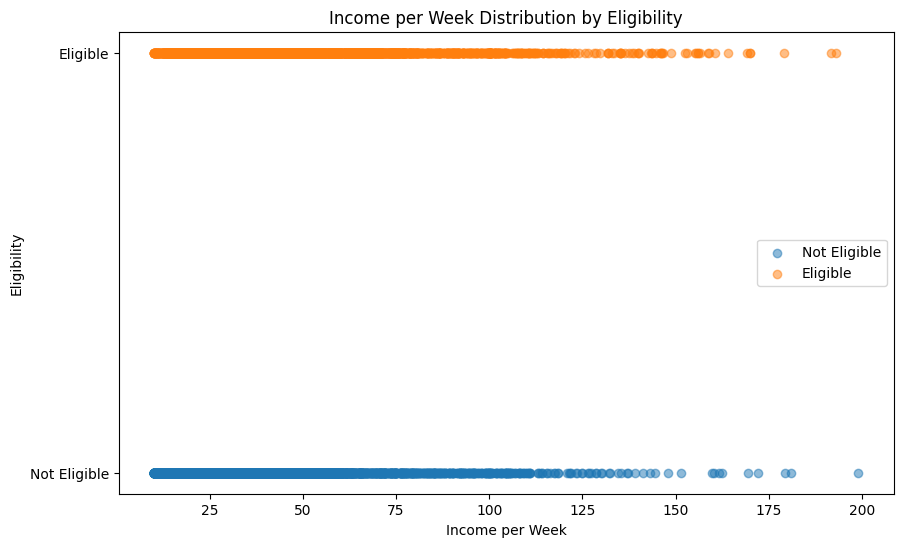

In [61]:
plt.figure(figsize=(10, 6))
plt.scatter(df[df['eligibility'] == 0]['income_per_week'], 
            [0] * len(df[df['eligibility'] == 0]), 
            alpha=0.5, label='Not Eligible')
plt.scatter(df[df['eligibility'] == 1]['income_per_week'], 
            [1] * len(df[df['eligibility'] == 1]), 
            alpha=0.5, label='Eligible')
plt.ylabel('Eligibility')
plt.xlabel('Income per Week')
plt.title('Income per Week Distribution by Eligibility')
plt.legend()
plt.yticks([0, 1], ['Not Eligible', 'Eligible'])
plt.show()

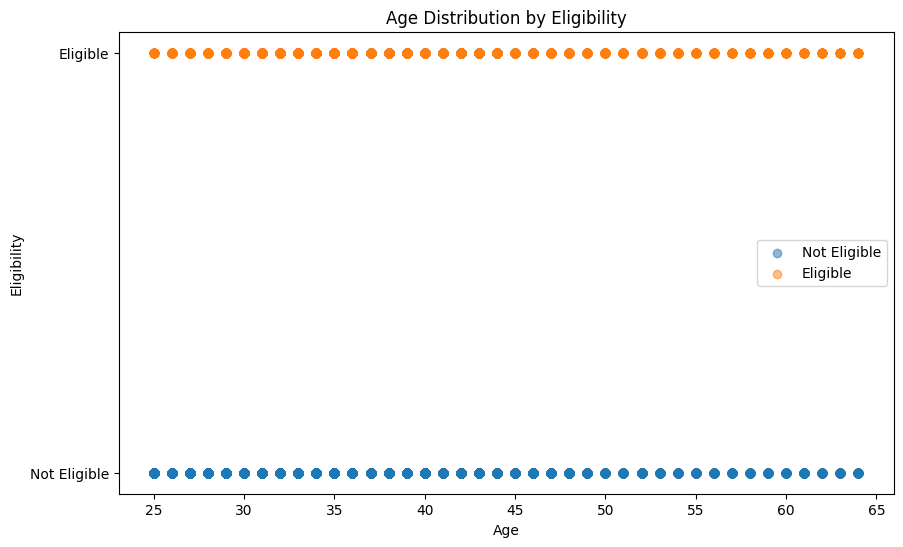

In [62]:
plt.figure(figsize=(10, 6))
plt.scatter(df[df['eligibility'] == 0]['age'], 
            [0] * len(df[df['eligibility'] == 0]), 
            alpha=0.5, label='Not Eligible')
plt.scatter(df[df['eligibility'] == 1]['age'], 
            [1] * len(df[df['eligibility'] == 1]), 
            alpha=0.5, label='Eligible')
plt.ylabel('Eligibility')
plt.xlabel('Age')
plt.title('Age Distribution by Eligibility')
plt.legend()
plt.yticks([0, 1], ['Not Eligible', 'Eligible'])
plt.show()

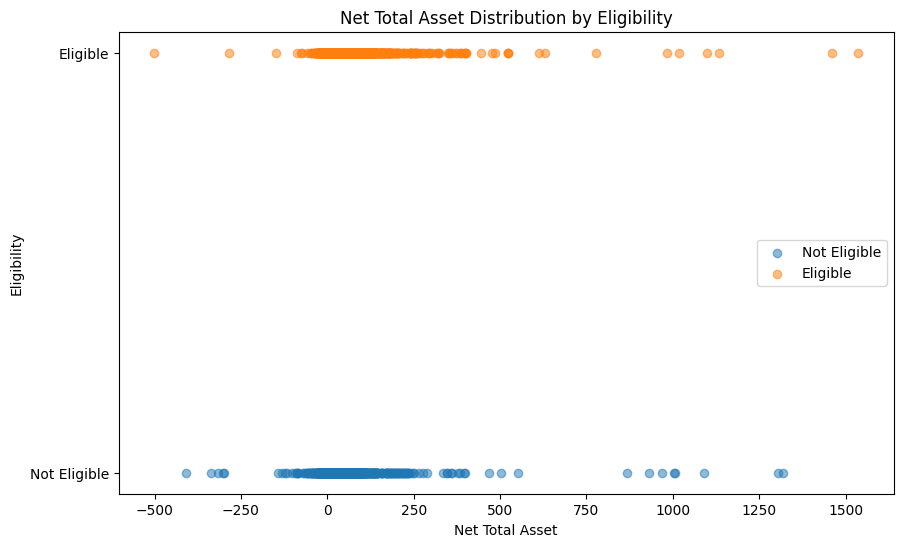

In [63]:
plt.figure(figsize=(10, 6))
plt.scatter(df[df['eligibility'] == 0]['net_total_asset'], 
            [0] * len(df[df['eligibility'] == 0]), 
            alpha=0.5, label='Not Eligible')
plt.scatter(df[df['eligibility'] == 1]['net_total_asset'], 
            [1] * len(df[df['eligibility'] == 1]), 
            alpha=0.5, label='Eligible')
plt.ylabel('Eligibility')
plt.xlabel('Net Total Asset')
plt.title('Net Total Asset Distribution by Eligibility')
plt.legend()
plt.yticks([0, 1], ['Not Eligible', 'Eligible'])
plt.show()

## **Analysis Based on Demographic Characteristics**

In [183]:
gender_crosstab = pd.crosstab(df['male'], df['eligibility'])
print("Crosstab for Gender:")
print(gender_crosstab)
print("\nChi-square test for Gender:")
chi2, p_value, dof, expected = stats.chi2_contingency(gender_crosstab)
print(f"Chi-square statistic: {chi2:.4f}")
print(f"p-value: {p_value:.4f}")

Crosstab for Gender:
eligibility     0     1
male                   
0            4435  2944
1            1203   693

Chi-square test for Gender:
Chi-square statistic: 6.9468
p-value: 0.0084


> **Insight:**

- Although statistically significant, the difference is relatively small (seen from the chi-square value that is not too large)
- The proportion of eligible men is slightly lower compared to women

In [184]:
marriage_crosstab = pd.crosstab(df['marriage'], df['eligibility'])
print("\nCrosstab for Marital Status:")
print(marriage_crosstab)
print("\nChi-square test for Marital Status:")
chi2, p_value, dof, expected = stats.chi2_contingency(marriage_crosstab)
print(f"Chi-square statistic: {chi2:.4f}")
print(f"p-value: {p_value:.4f}")


Crosstab for Marital Status:
eligibility     0     1
marriage               
0            2271  1174
1            3367  2463

Chi-square test for Marital Status:
Chi-square statistic: 60.2757
p-value: 0.0000


> **Insight:**

- Marital status has a stronger relationship with eligibility
- Married individuals have a higher proportion to be eligible compared to those who are not married

### **Subgroup Analysis Based on Age**

In [186]:
df['age_group'] = pd.cut(df['age'], bins=[25, 45, 64], labels=['Young', 'Old'])

In [187]:
def subgroup_ttest(data, var, group):
    young = data[data['age_group'] == 'Young']
    old = data[data['age_group'] == 'Old']
    
    t_young, p_young = stats.ttest_ind(
        young[young['eligibility'] == 1][var],
        young[young['eligibility'] == 0][var]
    )
    t_old, p_old = stats.ttest_ind(
        old[old['eligibility'] == 1][var],
        old[old['eligibility'] == 0][var]
    )
    
    print(f"\nSubgroup analysis for {var} by {group}:")
    print(f"Young: t-statistic = {t_young:.4f}, p-value = {p_young:.4f}")
    print(f"Old: t-statistic = {t_old:.4f}, p-value = {p_old:.4f}")

In [188]:
for var in ['income_per_week', 'net_total_asset']:
    subgroup_ttest(df, var, 'age_group')


Subgroup analysis for income_per_week by age_group:
Young: t-statistic = 21.3773, p-value = 0.0000
Old: t-statistic = 15.5773, p-value = 0.0000

Subgroup analysis for net_total_asset by age_group:
Young: t-statistic = 11.4279, p-value = 0.0000
Old: t-statistic = 8.7355, p-value = 0.0000


> **Insight:**

1. Income per week:
- Both young and old age groups show highly significant differences in income between eligible and non-eligible individual
- The t-statistic is higher for the young group compared to the old group, suggesting that the income difference between eligible and non-eligible individuals is more pronounced in the younger age group
- This indicates that income is a strong predictor of eligibility across all ages, but its impact may be even stronger among younger individuals

2. Net total asset:
- Both age groups also show highly significant differences in net total assets between eligible and non-eligible individual
- The t-statistic is higher for the young group compared to the old group, implying that the difference in net total assets between eligible and non-eligible individuals is more substantial in the younger age group
- This suggests that net total assets are an important factor for eligibility across all ages, but they may play a more crucial role in determining eligibility for younger individuals

# **Analysis Results**

### **Demographic Factors**

- Gender ('male')

There is a significant relationship with eligibility, although the difference is relatively small.
- Marital Status ('marriage')

Has a very significant relationship with eligibility. Married individuals have a higher proportion of being eligible.

### **Financial Factors**

- Weekly Income ('income_per_week')

Approximately $47.30 or more

- Net total asset ('net_total_asset')

Approximately $30,535 or more

### **Age Factor**

- There is an influence on eligibility, although not very strong.
- Subgroup analysis shows that financial factors play a stronger role in determining eligibility in the young age group (25-45 years) compared to the old age group (46-64 years).

### **Other Factor**

Family size does not have a significant effect on eligibility

# **Conclusion**

Based on the analysis conducted, it can be concluded that an individual's eligibility to participate in the pension program is strongly influenced by financial factors, especially weekly income and net total assets. Marital status also plays an important role, where married individuals tend to be more eligible for the pension program.

While demographic factors such as gender and age have an influence, their impact is not as strong as financial factors and marital status. 

Interestingly, the influence of financial factors on eligibility is stronger in the young age group compared to the old age group, indicating that pension programs may need to consider different approaches for different age groups. Family size, on the other hand, does not show a significant influence on pension program eligibility.